# Tests of motif counting functions

Here we show a set of test cases for motif counting functions
and structural coefficients which are simple enough to be checked
visually by humans. Example graphs in this notebook are generated using
the `igraph` package so it needs to be installed. Plotting requires
also `pycairo` or `cairocffi` package.

In [1]:
import numpy as np
import igraph as ig
from pathcensus import PathCensus


def plot(graph, bbox=(300,300), vertex_label=None, vertex_color="gray", **kwds):
    """Simple graph plotting function.
    
    It most cases it can be run without using any non-default values
    of the arguments.
    """
    if vertex_label is None:
        vertex_label = np.arange(graph.vcount())
    return ig.plot(graph, bbox=bbox, vertex_label=vertex_label, 
                   vertex_color=vertex_color, **kwds)

def add_random_weights(graph, vmin=1, vmax=10, seed=None):
    """Add random integer edge weights in the range ``[vmin, vmax-1]``."""
    if seed is not None:
        np.random.seed(seed)
    graph = graph.copy()
    weights = np.random.randint(vmin, vmax+1, (graph.ecount(),))
    graph.es["weight"] = weights
    return graph

## Triangle

Triangle based measure are $t$-clustering (`tclust`), $t$-closure (`tclosure`)
and structural similarity (at the level of edges, nodes and global). Below
are their mathematical definitions which can be used to check correctness
of the calculations.

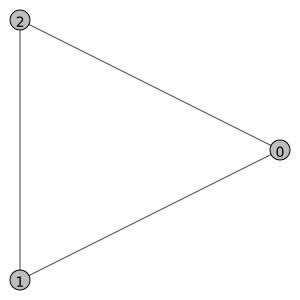

In [2]:
G = ig.Graph(directed=False)
G.add_vertices(3)
G.add_edges([
    (0, 1), (1, 2), (2, 0)
])

# Calculate path census
P = PathCensus(G)

plot(G)

### Node-level measures

#### `tclust` ($t$-clustering or local clustering coefficient)

$$
s^W_i = \frac{2T_i}{t^W_i}
$$

#### `tclosure` ($t$-closure or local closure coefficient)

$$
s^H_i = \frac{2T_i}{t^H_i}
$$

#### `sim` (structural similarity)

$$
s_i = \frac{4T_i}{t^W_i + t^H_i}
$$

In [3]:
P.coefs("nodes", census=True)

,sim,tclust,tclosure,comp,qclust,qclosure,t,tw,th,q0,qw,qh
i,,,,,,,,,,,,
0,1.0,1.0,1.0,NaN,NaN,NaN,1,2,2,0,0,0
1,1.0,1.0,1.0,NaN,NaN,NaN,1,2,2,0,0,0
2,1.0,1.0,1.0,NaN,NaN,NaN,1,2,2,0,0,0


### Edge-level measures

#### Edge-wise similarity

$$
s_{ij} = \frac{2T_{ij}}{t^W_{ij} + t^H_{ij}}
$$

In [4]:
P.coefs("edges", census=True)

sim  comp  t  tw  th  q0  qw  qh
i j                                  
0 1  1.0   NaN  1   1   1   0   0   0
  2  1.0   NaN  1   1   1   0   0   0
1 0  1.0   NaN  1   1   1   0   0   0
  2  1.0   NaN  1   1   1   0   0   0
2 0  1.0   NaN  1   1   1   0   0   0
  1  1.0   NaN  1   1   1   0   0   0

### Global measures

All three global measures are equivalent.

#### Global clustering

$$
s^W = \frac{3T}{t^W}
$$

#### Global closure

$$
s^H = \frac{3T}{t^H}
$$

#### Global similarity

$$
s = s^W = s^H = \frac{6T}{t^H + t^W}
$$

In [5]:
P.coefs("global", census=True)

,sim_g,sim,tclust,tclosure,comp_g,comp,qclust,qclosure,t,tw,th,q0,qw,qh
0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1,3,3,0,0,0


## Strong quadrangle

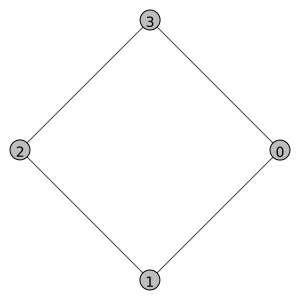

In [6]:
G = ig.Graph(directed=False)
G.add_vertices(4)
G.add_edges([
    (0, 1), (1, 2), (2, 3), (3, 0),
])

# Calculate path census
P = PathCensus(G)

plot(G)

### Node-level measures

#### `qclust` ($q$-clustering)

$$
c^W_i = \frac{2Q_i}{q^W_i}
$$

#### `qclosure` ($q$-closure)

$$
c^H_i = \frac{2Q_i}{q^H_i}
$$

#### `comp` (structural complementarity)

$$
c_i = \frac{4Q_i}{q^W_i + q^H_i}
$$

In [7]:
P.coefs("nodes", census=True)

,sim,tclust,tclosure,comp,qclust,qclosure,t,tw,th,q0,qw,qh
i,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,1.0,1.0,0,2,2,1,2,2
1,0.0,0.0,0.0,1.0,1.0,1.0,0,2,2,1,2,2
2,0.0,0.0,0.0,1.0,1.0,1.0,0,2,2,1,2,2
3,0.0,0.0,0.0,1.0,1.0,1.0,0,2,2,1,2,2


### Edge-level measures

#### Edge-wise complementarity

$$
c_{ij} = \frac{2Q_{ij}}{q^W_{ij} + q^H_{ij}}
$$

In [8]:
P.coefs("edges", census=True)

sim  comp  t  tw  th  q0  qw  qh
i j                                  
0 1  0.0   1.0  0   1   1   1   1   1
  3  0.0   1.0  0   1   1   1   1   1
1 0  0.0   1.0  0   1   1   1   1   1
  2  0.0   1.0  0   1   1   1   1   1
2 1  0.0   1.0  0   1   1   1   1   1
  3  0.0   1.0  0   1   1   1   1   1
3 0  0.0   1.0  0   1   1   1   1   1
  2  0.0   1.0  0   1   1   1   1   1

### Global measures

All global measures are equivalent.

#### Global $q$-clustering

$$
c^W = \frac{4Q}{q^W}
$$

#### Global $q$-closure

$$
c^H = \frac{4Q}{q^H}
$$

#### Global complementarity

$$
c = c^W = c^H = \frac{8Q}{q^W + q^H}
$$

In [9]:
P.coefs("global", census=True)

,sim_g,sim,tclust,tclosure,comp_g,comp,qclust,qclosure,t,tw,th,q0,qw,qh
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0,4,4,1,4,4


## Fully-connected network

Here we confirm that structural similarity is maximal in fully-connected
networks. And we check this for a network with random weights to show
that at the same time that weighted coefficients are properly normalized
in the `[0, 1]` range.

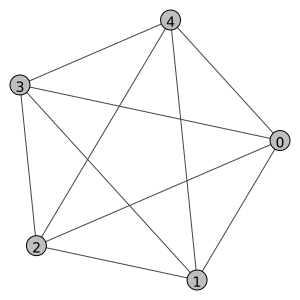

In [10]:
G = ig.Graph.Full(5)
G = add_random_weights(G)

# Calculate path census
P = PathCensus(G)

plot(G)

In [11]:
## NODES
P.coefs("nodes", census=True)

,sim,tclust,tclosure,comp,qclust,qclosure,twc,thc,tw,th,q0wc,q0hc,qw,qh
i,,,,,,,,,,,,,,
0,1.0,1.0,1.0,0.0,0.0,0.0,39.0,42.50,78.0,85.0,0.0,0.0,165.333333,174.666667
1,1.0,1.0,1.0,0.0,0.0,0.0,55.5,45.25,111.0,90.5,0.0,0.0,194.666667,167.333333
2,1.0,1.0,1.0,0.0,0.0,0.0,37.5,42.25,75.0,84.5,0.0,0.0,162.666667,175.333333
3,1.0,1.0,1.0,0.0,0.0,0.0,43.5,43.25,87.0,86.5,0.0,0.0,173.333333,172.666667
4,1.0,1.0,1.0,0.0,0.0,0.0,40.5,42.75,81.0,85.5,0.0,0.0,168.000000,174.000000


In [12]:
## EDGES
P.coefs("edges", census=True)

sim  comp   twc   thc    tw    th  q0wc  q0hc         qw         qh
i j                                                                     
0 1  1.0   0.0  22.0  27.5  22.0  27.5   0.0   0.0  41.333333  48.666667
  2  1.0   0.0  18.0  17.5  18.0  17.5   0.0   0.0  41.333333  40.666667
  3  1.0   0.0  21.0  22.5  21.0  22.5   0.0   0.0  44.666667  46.666667
  4  1.0   0.0  17.0  17.5  17.0  17.5   0.0   0.0  38.000000  38.666667
1 0  1.0   0.0  27.5  22.0  27.5  22.0   0.0   0.0  48.666667  41.333333
  2  1.0   0.0  27.5  21.5  27.5  21.5   0.0   0.0  49.333333  41.333333
  3  1.0   0.0  27.5  23.5  27.5  23.5   0.0   0.0  46.666667  41.333333
  4  1.0   0.0  28.5  23.5  28.5  23.5   0.0   0.0  50.000000  43.333333
2 0  1.0   0.0  17.5  18.0  17.5  18.0   0.0   0.0  40.666667  41.333333
  1  1.0   0.0  21.5  27.5  21.5  27.5   0.0   0.0  41.333333  49.333333
  3  1.0   0.0  17.5  19.5  17.5  19.5   0.0   0.0  38.666667  41.333333
  4  1.0   0.0  18.5  19.5  18.5  19.5   0.0   0.0  42.000000  43.333333
3 0  1.0   0.0  22.5  21.0  22.5  21.0   0.0   0.0  46.666667  44.666667
  1  1.0   0.0  23.5  27.5  23.5  27.5   0.0   0.0  41.333333  46.666667
  2  1.0   0.0  19.5  17.5  19.5  17.5   0.0   0.0  41.333333  38.666667
  4  1.0   0.0  21.5  20.5  21.5  20.5   0.0   0.0  44.000000  42.666667
4 0  1.0   0.0  17.5  17.0  17.5  17.0   0.0   0.0  38.666667  38.000000
  1  1.0   0.0  23.5  28.5  23.5  28.5   0.0   0.0  43.333333  50.000000
  2  1.0   0.0  19.5  18.5  19.5  18.5   0.0   0.0  43.333333  42.000000
  3  1.0   0.0  20.5  21.5  20.5  21.5   0.0   0.0  42.666667  44.000000

In [13]:
## GLOBAL
P.coefs("global", census=True)

,sim_g,sim,tclust,tclosure,comp_g,comp,qclust,qclosure,twc,thc,tw,th,q0wc,q0hc,qw,qh
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,72.0,72.0,216.0,216.0,0.0,0.0,432.0,432.0


## Fully-connected bipartite network

Here we confirm that structural complementarity is maximal in fully-connected
bipartite networks. And we check this for a network with random weights to 
show that at the same time that weighted coefficients are properly normalized
in the `[0, 1]` range.

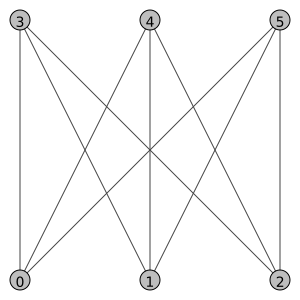

In [14]:
G = ig.Graph.Full_Bipartite(3, 3)
G = add_random_weights(G)

# Calculate path census
P = PathCensus(G)

plot(G, layout=G.layout_bipartite())

In [15]:
## NODES
P.coefs("nodes", census=True)

,sim,tclust,tclosure,comp,qclust,qclosure,twc,thc,tw,th,q0wc,q0hc,qw,qh
i,,,,,,,,,,,,,,
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,30.0,34.5,33.0,36.0,66.0,72.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,44.0,38.0,40.0,36.0,80.0,72.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,34.0,35.5,35.0,36.0,70.0,72.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,28.0,34.0,32.0,36.0,64.0,72.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,40.0,37.0,38.0,36.0,76.0,72.0
5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,40.0,37.0,38.0,36.0,76.0,72.0


In [16]:
## EDGES
P.coefs("edges", census=True)

sim  comp  twc  thc    tw    th       q0wc       q0hc         qw  \
i j                                                                     
0 3  0.0   1.0  0.0  0.0   9.0   8.5  21.333333  20.666667  21.333333   
  4  0.0   1.0  0.0  0.0  11.0  13.5  23.333333  26.666667  23.333333   
  5  0.0   1.0  0.0  0.0  10.0  12.5  21.333333  24.666667  21.333333   
1 3  0.0   1.0  0.0  0.0  14.0  10.0  26.666667  21.333333  26.666667   
  4  0.0   1.0  0.0  0.0  14.0  13.0  24.666667  23.333333  24.666667   
  5  0.0   1.0  0.0  0.0  16.0  15.0  28.666667  27.333333  28.666667   
2 3  0.0   1.0  0.0  0.0  11.0   9.5  24.000000  22.000000  24.000000   
  4  0.0   1.0  0.0  0.0  12.0  13.5  24.000000  26.000000  24.000000   
  5  0.0   1.0  0.0  0.0  11.0  12.5  22.000000  24.000000  22.000000   
3 0  0.0   1.0  0.0  0.0   8.5   9.0  20.666667  21.333333  20.666667   
  1  0.0   1.0  0.0  0.0  10.0  14.0  21.333333  26.666667  21.333333   
  2  0.0   1.0  0.0  0.0   9.5  11.0  22.000000  24.000000  22.000000   
4 0  0.0   1.0  0.0  0.0  13.5  11.0  26.666667  23.333333  26.666667   
  1  0.0   1.0  0.0  0.0  13.0  14.0  23.333333  24.666667  23.333333   
  2  0.0   1.0  0.0  0.0  13.5  12.0  26.000000  24.000000  26.000000   
5 0  0.0   1.0  0.0  0.0  12.5  10.0  24.666667  21.333333  24.666667   
  1  0.0   1.0  0.0  0.0  15.0  16.0  27.333333  28.666667  27.333333   
  2  0.0   1.0  0.0  0.0  12.5  11.0  24.000000  22.000000  24.000000   

            qh  
i j             
0 3  20.666667  
  4  26.666667  
  5  24.666667  
1 3  21.333333  
  4  23.333333  
  5  27.333333  
2 3  22.000000  
  4  26.000000  
  5  24.000000  
3 0  21.333333  
  1  26.666667  
  2  24.000000  
4 0  23.333333  
  1  24.666667  
  2  24.000000  
5 0  21.333333  
  1  28.666667  
  2  22.000000

In [17]:
## GLOBAL
P.coefs("global", census=True)

,sim_g,sim,tclust,tclosure,comp_g,comp,qclust,qclosure,twc,thc,tw,th,q0wc,q0hc,qw,qh
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,108.0,108.0,54.0,54.0,216.0,216.0
